
#Data preproces



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# read the csv file
df_raw = pd.read_csv('/content/drive/MyDrive/data/sdp2022/task1_train_dataset.csv')

df = df_raw.copy()
df

Mounted at /content/drive


,index,title,first_author,description,core_id,doi,pub_year,theme
0,0,Activation of nitrofurazone by azoreductases: ...,M Nakanishi,NaN,190682983,10.1038/srep00063,2011,"Allied Health Professions, Dentistry, Nursing ..."
1,1,Organisation and delivery of home care re-able...,Allen,NaN,403149987,10.1111/j.1365-2524.2011.01010.x,2011,Social Work and Social Policy
2,2,Relationships between anthocyanins and other c...,Aurélie Bechoff,NaN,247875062,10.1016/j.foodchem.2013.09.132,2013,"Agriculture, Veterinary and Food Science"
3,3,New Insights into the Mechanisms of Water-Stre...,H. Cochard,NaN,253594132,10.1104/pp.109.138305,2009,Earth Systems and Environmental Sciences
4,4,Extensive chordate and annelid macrosynteny re...,"Hui, Jerome H.L.",Genes with the homeobox motif are crucial in d...,15139448,10.1093/molbev/msr175,2012,Biological Sciences
...,...,...,...,...,...,...,...,...
51555,51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,Bryson Karen J.,NaN,204005191,10.1371/journal.pntd.0000930,2011,"Allied Health Professions, Dentistry, Nursing ..."
51556,51556,The Afterlife of Parliamentary Sovereignty,"Barber, NW",NaN,77380845,10.1093/icon/mor023,2011,Law
51557,51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"O'Kane, Anthony A",NaN,16499864,10.1021/es305345u,2013,"Agriculture, Veterinary and Food Science"
51558,51558,Constant flux relation for diffusion-limited c...,"Connaughton, Colm","In a non-equilibrium system, a Constant Flux R...",2002669,10.1103/PhysRevE.78.041403,2008,Mathematical Sciences


In [2]:
df['description_fillna'] = df.description.fillna('')


In [3]:
df["text"] = df["title"].astype(str) + '. ' + df["description_fillna"].astype(str)


In [4]:
pd.options.display.max_colwidth = 150

In [5]:
df_short = df[['text','theme']]
df_short

,text,theme
0,Activation of nitrofurazone by azoreductases: multiple activities in one enzyme.,"Allied Health Professions, Dentistry, Nursing and Pharmacy"
1,Organisation and delivery of home care re-ablement : what makes a difference?.,Social Work and Social Policy
2,Relationships between anthocyanins and other compounds and sensory acceptability of Hibiscus drinks.,"Agriculture, Veterinary and Food Science"
3,New Insights into the Mechanisms of Water-Stress-Induced Cavitation in Conifers.,Earth Systems and Environmental Sciences
4,Extensive chordate and annelid macrosynteny reveals ancestral homeobox gene organization. Genes with the homeobox motif are crucial in development...,Biological Sciences
...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R alpha expression control Leishmania mexicana load although female but not male mice develop a healer ...,"Allied Health Professions, Dentistry, Nursing and Pharmacy"
51556,The Afterlife of Parliamentary Sovereignty.,Law
51557,Metabolomic Proﬁling of In Vivo Plasma Responses to DioxinAssociated Dietary Contaminant Exposure in Rats: Implications for Identiﬁcation of Sourc...,"Agriculture, Veterinary and Food Science"
51558,"Constant flux relation for diffusion-limited cluster-cluster aggregation. In a non-equilibrium system, a Constant Flux Relation (CFR) expresses th...",Mathematical Sciences


# illustration

In [8]:
df_short__text_length_ = df_short.text.apply(lambda x: len(x.split()))
df_short__text_length_

0         10
1         12
2         12
3         10
4        212
        ... 
51555     24
51556      5
51557     24
51558    267
51559     20
Name: text, Length: 51560, dtype: int64

In [10]:
df_short__text_length_.mean()

69.36846392552366

In [11]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51560 entries, 0 to 51559
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    51560 non-null  object
 1   theme   51560 non-null  object
dtypes: object(2)
memory usage: 805.8+ KB


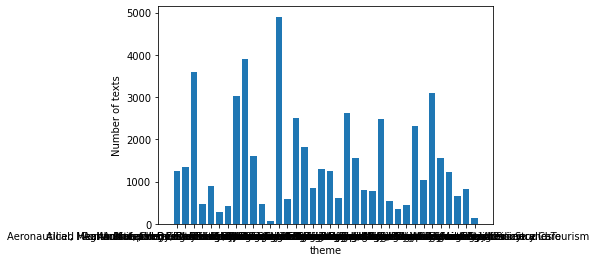

In [13]:

import matplotlib.pyplot as plt


theme_count=df_short.groupby('theme').count()
plt.bar(theme_count.index.values, theme_count['text'])
plt.xlabel('theme')
plt.ylabel('Number of texts')
plt.show()

# NLTK Sentiment Analysis Tutorial: Text Mining & Analysis in Python | DataCamp
# https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

# Feature Generation using Bag of Words


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df_short['text'])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_short['theme'], test_size=0.2, random_state=1)

In [24]:
X_train

<41248x95537 sparse matrix of type '<class 'numpy.int64'>'
	with 1338875 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.4746896819239721


In [ ]:

# tf-idf

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df_short['text'])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df_short['theme'], test_size=0.2, random_state=123)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.3686966640806827
